## Contoh Dasar Pandas

Notebook ini akan memandu Anda melalui beberapa konsep dasar Pandas. Kita akan mulai dengan mengimpor pustaka-pustaka ilmu data yang umum digunakan:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Seri

Seri mirip dengan daftar atau array 1D, tetapi memiliki indeks. Semua operasi diselaraskan berdasarkan indeks.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Salah satu penggunaan umum dari series adalah **time series**. Dalam time series, indeks memiliki struktur khusus - biasanya berupa rentang tanggal atau waktu. Kita dapat membuat indeks seperti itu dengan `pd.date_range`.

Misalkan kita memiliki sebuah series yang menunjukkan jumlah produk yang dibeli setiap hari, dan kita tahu bahwa setiap hari Minggu kita juga perlu mengambil satu item untuk diri kita sendiri. Berikut adalah cara memodelkannya menggunakan series:


Length of index is 366


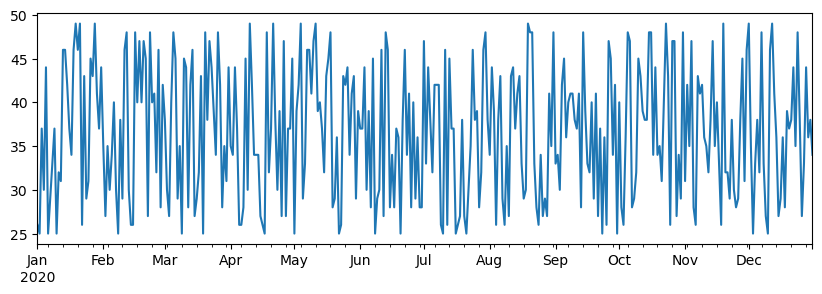

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Seperti yang Anda lihat, kami mengalami masalah di sini, karena dalam seri mingguan hari-hari yang tidak disebutkan dianggap hilang (`NaN`), dan menambahkan `NaN` ke sebuah angka menghasilkan `NaN`. Untuk mendapatkan hasil yang benar, kita perlu menentukan `fill_value` saat menambahkan seri:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


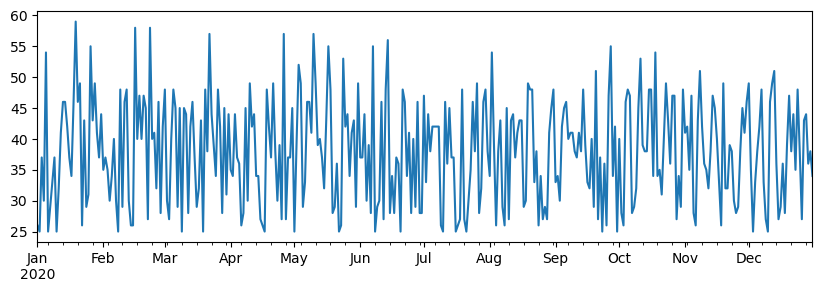

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

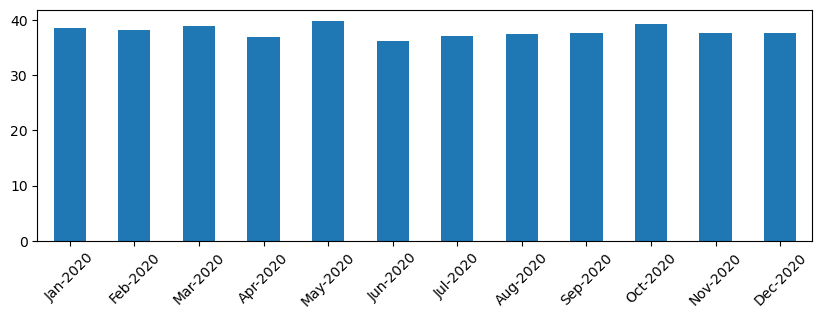

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Dataframe pada dasarnya adalah kumpulan series dengan indeks yang sama. Kita dapat menggabungkan beberapa series menjadi sebuah dataframe. Dengan series `a` dan `b` yang telah didefinisikan di atas:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Kita juga dapat menggunakan Series sebagai kolom, dan menentukan nama kolom menggunakan kamus:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Hasil yang sama dapat dicapai dengan mentransposisi (dan kemudian mengganti nama kolom, untuk mencocokkan contoh sebelumnya):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Memilih kolom** dari DataFrame dapat dilakukan seperti ini:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Memilih baris** berdasarkan ekspresi filter:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Cara kerjanya adalah bahwa ekspresi `df['A']<5` mengembalikan seri boolean, yang menunjukkan apakah ekspresi tersebut `True` atau `False` untuk setiap elemen dalam seri. Ketika seri digunakan sebagai indeks, ini mengembalikan subset baris dalam DataFrame. Oleh karena itu, tidak memungkinkan untuk menggunakan ekspresi boolean Python sembarang, misalnya, menulis `df[df['A']>5 and df['A']<7]` akan salah. Sebagai gantinya, Anda harus menggunakan operasi khusus `&` pada seri boolean:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Membuat kolom komputasi baru**. Kita dapat dengan mudah membuat kolom komputasi baru untuk DataFrame kita dengan menggunakan ekspresi yang intuitif. Kode di bawah ini menghitung divergensi A dari nilai rata-ratanya.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Yang sebenarnya terjadi adalah kita menghitung sebuah deret, lalu menetapkan deret ini ke sisi kiri, menciptakan kolom lain.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Memilih baris berdasarkan angka** dapat dilakukan menggunakan konstruk `iloc`. Sebagai contoh, untuk memilih 5 baris pertama dari DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Pengelompokan** sering digunakan untuk mendapatkan hasil yang mirip dengan *pivot tables* di Excel. Misalkan kita ingin menghitung nilai rata-rata dari kolom `A` untuk setiap angka yang diberikan pada `LenB`. Maka kita dapat mengelompokkan DataFrame kita berdasarkan `LenB`, dan memanggil `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Jika kita perlu menghitung rata-rata dan jumlah elemen dalam grup, maka kita dapat menggunakan fungsi `aggregate` yang lebih kompleks:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Mencetak dan Memplot

Seorang Data Scientist sering kali harus mengeksplorasi data, sehingga penting untuk dapat memvisualisasikannya. Ketika DataFrame berukuran besar, sering kali kita hanya ingin memastikan bahwa semuanya berjalan dengan benar dengan mencetak beberapa baris pertama. Hal ini dapat dilakukan dengan memanggil `df.head()`. Jika Anda menjalankannya dari Jupyter Notebook, itu akan mencetak DataFrame dalam bentuk tabel yang rapi.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Kami juga telah melihat penggunaan fungsi `plot` untuk memvisualisasikan beberapa kolom. Meskipun `plot` sangat berguna untuk banyak tugas dan mendukung berbagai jenis grafik melalui parameter `kind=`, Anda selalu dapat menggunakan pustaka `matplotlib` secara langsung untuk membuat grafik yang lebih kompleks. Kami akan membahas visualisasi data secara mendetail dalam pelajaran kursus terpisah.


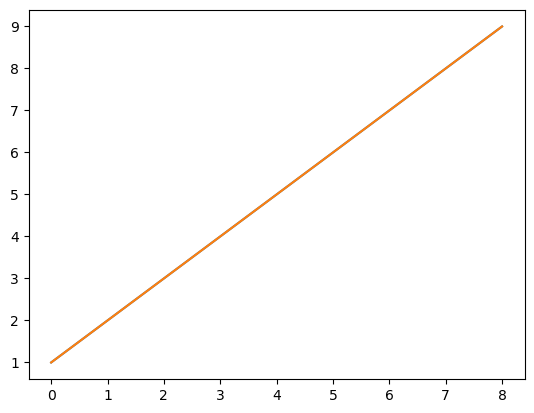

In [61]:
df['A'].plot()
plt.show()

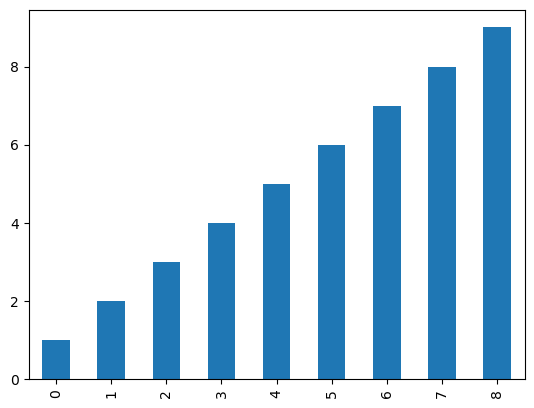

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ikhtisar ini mencakup konsep-konsep paling penting dari Pandas, namun perpustakaan ini sangat kaya, dan tidak ada batasan untuk apa yang dapat Anda lakukan dengannya! Sekarang, mari kita terapkan pengetahuan ini untuk menyelesaikan masalah tertentu.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan penerjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berusaha untuk memberikan hasil yang akurat, harap diingat bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang otoritatif. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemahan profesional oleh manusia. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
